In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv('energy_states_consolidated.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y') # Converting the 'Date' Column to Datetime Format
df.set_index('Date', inplace=True) # Setting 'Date' as the Index

In [ ]:
df.head() #prints first 5 rows of the table

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K(UT) & Ladakh(UT),Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2020-01-02,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
2020-01-03,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
2020-01-04,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
2020-01-05,118.0,132.1,241.9,71.1,294.2,40.1,30.1,53.3,4.0,73.1,...,64.0,109.3,1.5,2.2,21.4,2.5,6.1,1.8,2.3,3.3


In [ ]:
# Display basic information about dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1600 entries, 2020-01-01 to 2024-05-22
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Punjab                1586 non-null   float64
 1   Haryana               1586 non-null   float64
 2   Rajasthan             1586 non-null   float64
 3   Delhi                 1586 non-null   float64
 4   UP                    1586 non-null   float64
 5   Uttarakhand           1586 non-null   float64
 6   HP                    1586 non-null   float64
 7   J&K(UT) & Ladakh(UT)  1585 non-null   float64
 8   Chandigarh            1586 non-null   float64
 9   Chhattisgarh          1585 non-null   float64
 10  Gujarat               1586 non-null   float64
 11  MP                    1586 non-null   float64
 12  Maharashtra           1586 non-null   float64
 13  Goa                   1586 non-null   float64
 14  Andhra Pradesh        1586 non-null   f

In [ ]:
# Summary statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            Punjab      Haryana    Rajasthan        Delhi           UP  \
count  1586.000000  1586.000000  1586.000000  1586.000000  1586.000000   
mean    175.107125   157.262673   259.635183    88.756747   368.118222   
std      64.783402    41.377884    40.588278    24.817965    83.339230   
min      57.600000    65.900000    66.000000    41.800000   205.000000   
25%     126.975000   128.500000   234.200000    68.425000   301.125000   
50%     150.700000   145.000000   259.800000    80.400000   347.800000   
75%     219.575000   184.800000   289.475000   109.100000   428.575000   
max     343.500000   273.100000   371.600000   160.800000   606.200000   

       Uttarakhand           HP  J&K(UT) & Ladakh(UT)   Chandigarh  \
count  1586.000000  1586.000000           1585.000000  1586.000000   
mean     39.994010    30.823014             51.040694     4.590542   
std       6.006756     4.554835              6.229544     1.750864   
min      16.800000    -6.100000

In [ ]:
# Check data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
Punjab                  float64
Haryana                 float64
Rajasthan               float64
Delhi                   float64
UP                      float64
Uttarakhand             float64
HP                      float64
J&K(UT) & Ladakh(UT)    float64
Chandigarh              float64
Chhattisgarh            float64
Gujarat                 float64
MP                      float64
Maharashtra             float64
Goa                     float64
Andhra Pradesh          float64
Telangana               float64
Karnataka               float64
Kerala                  float64
Tamil Nadu              float64
Puducherry              float64
Bihar                   float64
DVC                     float64
Jharkhand               float64
Odisha                  float64
West Bengal             float64
Sikkim                  float64
Arunachal Pradesh       float64
Assam                   float64
Manipur                 float64
Meghalaya               float64
Mizoram                 flo

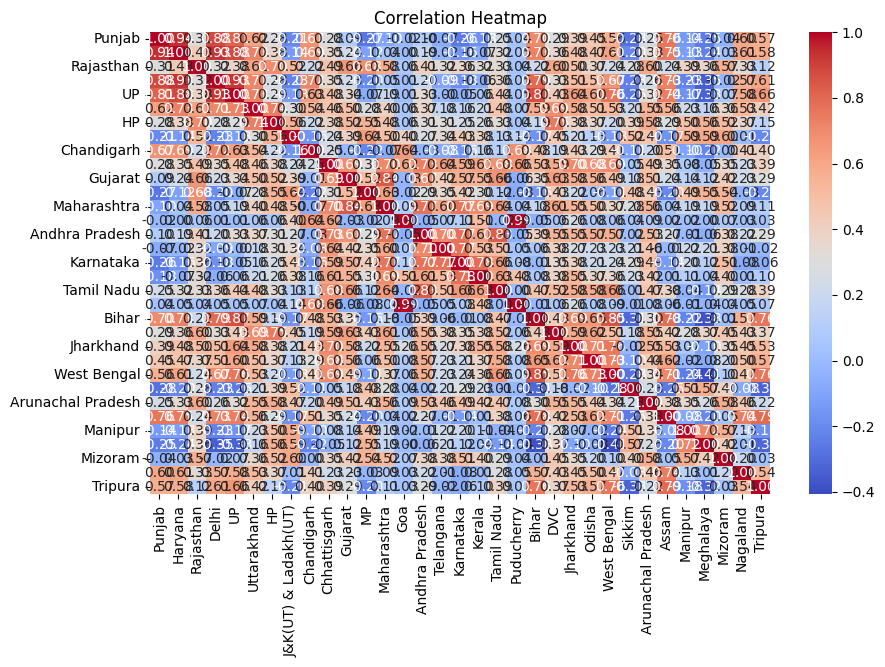

In [ ]:
# Check correlation between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

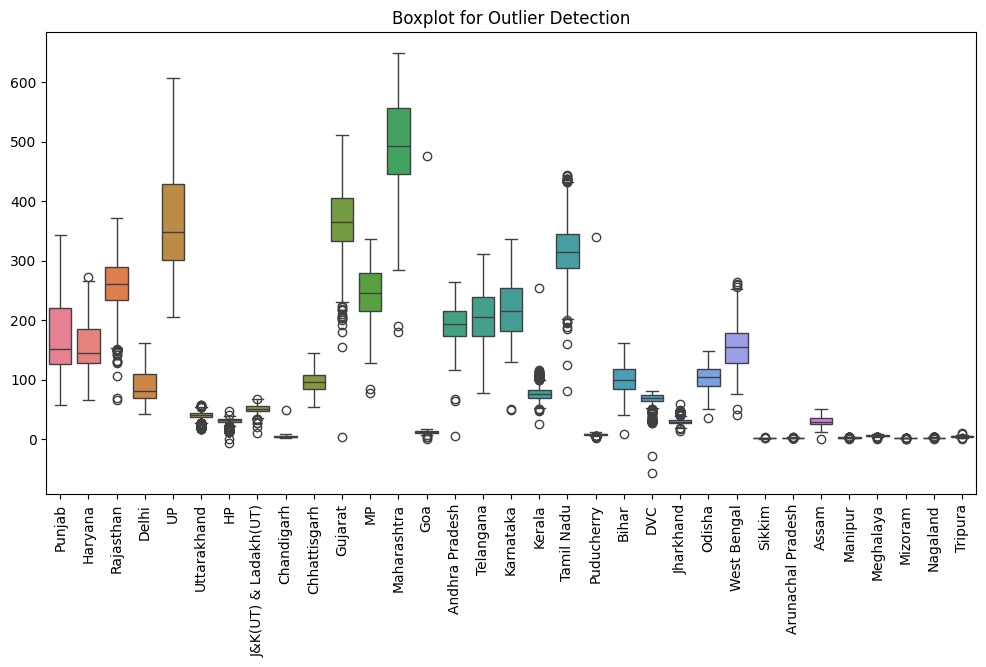

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

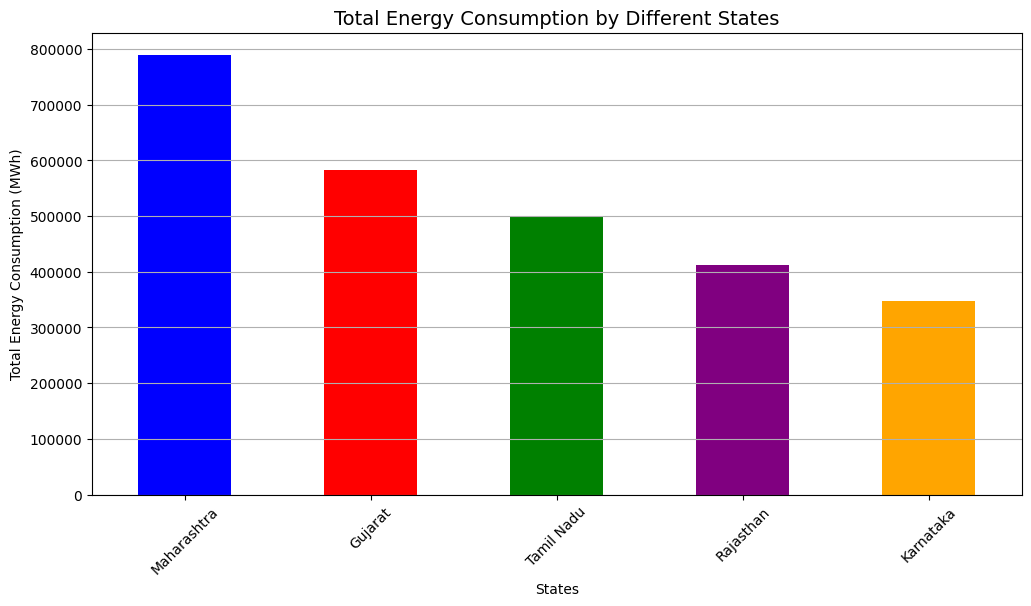

In [ ]:
# Select columns representing different states (modify based on actual dataset)
states = ['Maharashtra', 'Gujarat', 'Tamil Nadu', 'Karnataka', 'Rajasthan']

# Plot total energy consumption by each state using a bar chart
plt.figure(figsize=(12, 6))
df[states].sum().sort_values(ascending=False).plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'orange'])
plt.title("Total Energy Consumption by Different States", fontsize=14)
plt.xlabel("States")
plt.ylabel("Total Energy Consumption (MWh)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

LSTM

In [ ]:
data = df[['Maharashtra']].dropna() # Removes any NaN values from the 'Maharashtra' column.

In [ ]:
scaler = MinMaxScaler() # scales data between 0 and 1
data_scaled = scaler.fit_transform(data)

In [ ]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])   # Select 'time_steps' values
        y.append(data[i+time_steps]) # The next value after the sequence
    return np.array(X), np.array(y)


In [ ]:
# Prepare training data
time_steps = 10
X, y = create_sequences(data_scaled, time_steps)
X_train, y_train = X[:int(0.8*len(X))], y[:int(0.8*len(y))]
X_test, y_test = X[int(0.8*len(X)):], y[int(0.8*len(y)):]

In [ ]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.1226
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0038
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0032
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033
Epo

In [ ]:
# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
# Prepare data for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

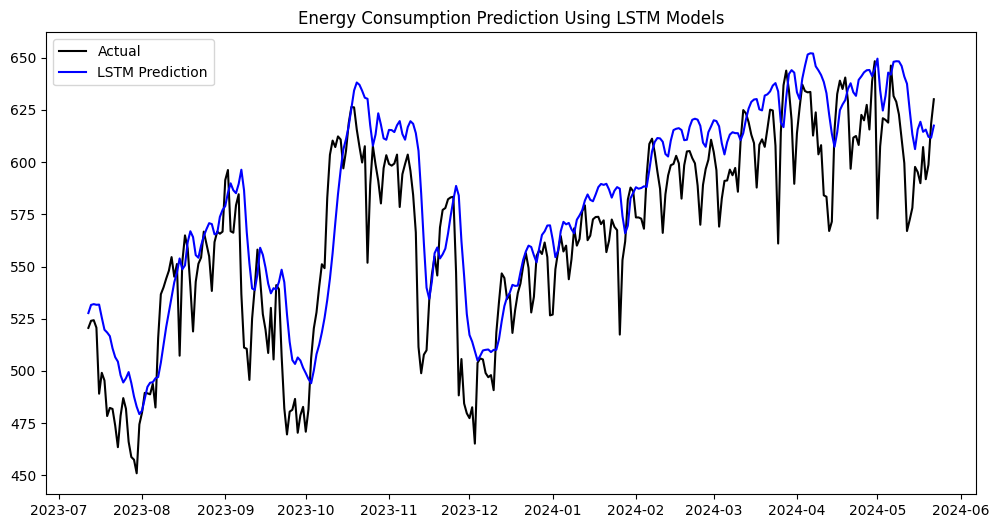

In [ ]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual', color='black')
plt.plot(data.index[-len(y_test_actual):], lstm_predictions, label='LSTM Prediction', color='blue')
plt.legend()
plt.title('Energy Consumption Prediction Using LSTM Models')
plt.show()

In [ ]:
# Evaluate models
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)

print(f'LSTM MSE: {lstm_mse}')

LSTM MSE: 754.026303463771


XGBOOST

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [ ]:
# Scale data to range (0,1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Function to create time-series sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Input sequence
        y.append(data[i+time_steps])    # Target value
    return np.array(X), np.array(y)

# Define number of past time steps to use as features
time_steps = 10
X, y = create_sequences(data_scaled, time_steps)

In [ ]:
# Split data into training (80%) and testing (20%) sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape data to be 2D (XGBoost does not accept 3D inputs)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [ ]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')

# Train the model
xgb_model.fit(X_train_flat, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test_flat)

# Reverse the scaling to get actual values
xgb_predictions = scaler.inverse_transform(xgb_predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


In [ ]:
# Calculate Mean Squared Error
xgb_mse = mean_squared_error(y_test_actual, xgb_predictions)
print(f'XGBoost MSE: {xgb_mse}')


XGBoost MSE: 390.1592590311194


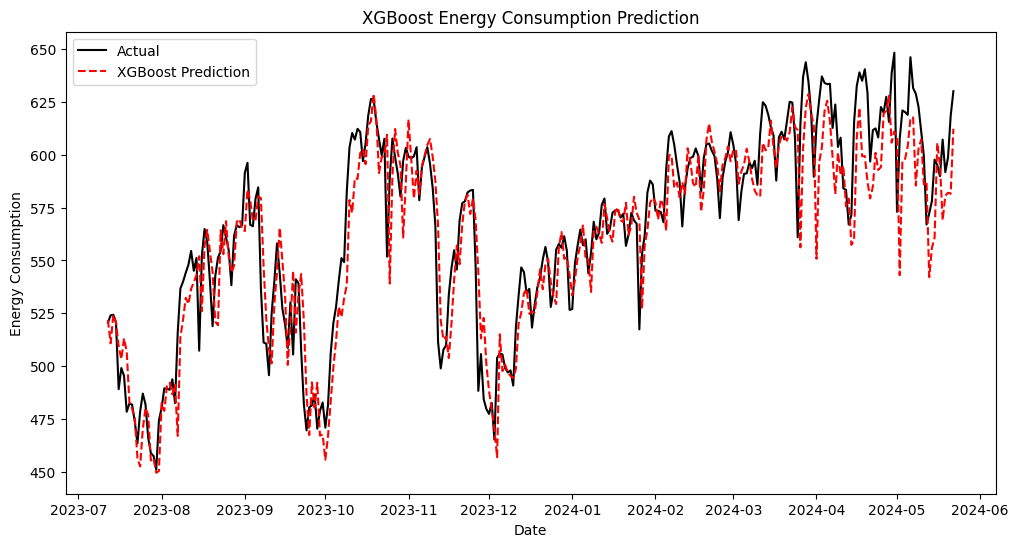

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual', color='black')
plt.plot(data.index[-len(y_test_actual):], xgb_predictions, label='XGBoost Prediction', color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("XGBoost Energy Consumption Prediction")
plt.legend()
plt.show()


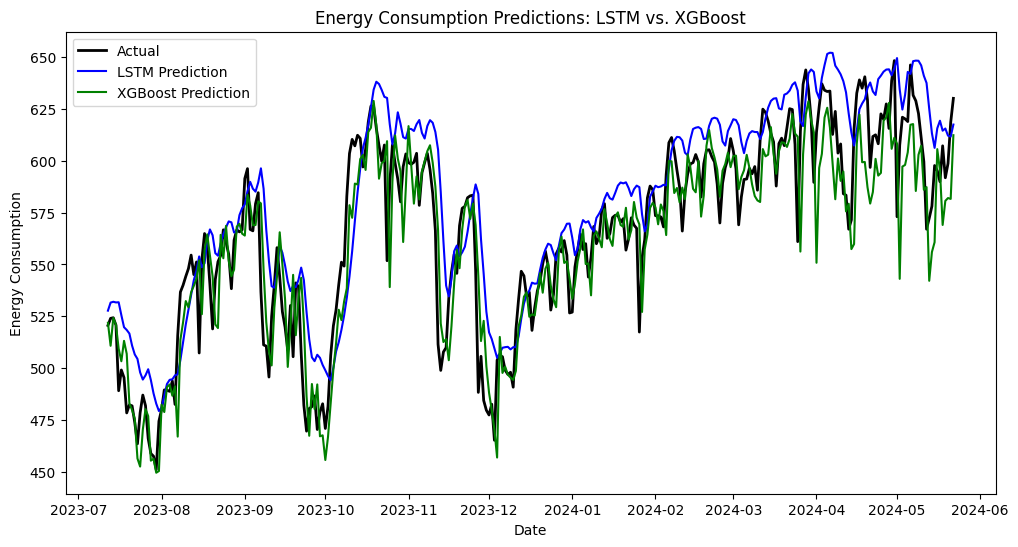

In [ ]:
# Plot actual vs predicted values for LSTM, Random Forest, and Linear Regression
plt.figure(figsize=(12,6))

# Plot actual values
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual', color='black', linewidth=2)

# Plot LSTM predictions
plt.plot(data.index[-len(y_test_actual):], lstm_predictions, label='LSTM Prediction', color='blue')

# Plot XGBoost predictions
plt.plot(data.index[-len(y_test_actual):], xgb_predictions, label='XGBoost Prediction', color='green')

# Add legend and labels
plt.legend()
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Predictions: LSTM vs. XGBoost")

# Show the plot
plt.show()
